<a href="https://colab.research.google.com/github/syriness/MiniProject_AirlineMachineLearning/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

## 학습데이터

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

airline_train = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/train.csv")

airline_train.isnull().sum()
airline_train.dropna(inplace=True)
airline_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
airline_train.drop(columns = ["Unnamed: 0","id", "Gender", "Customer Type","Age", "Type of Travel", "Class", "Flight Distance"], inplace = True)

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(airline_train['satisfaction'])
airline_train['satisfaction'] = encoder.transform(airline_train['satisfaction'])

In [4]:
airline_train

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


## 테스트데이터

In [5]:
airline_test = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/test.csv")
airline_test.isnull().sum()
airline_test.dropna(inplace=True)
airline_test.drop(columns = ["Unnamed: 0","id", "Gender", "Customer Type","Age", "Type of Travel", "Class", "Flight Distance"], inplace = True)

encoder = LabelEncoder()
encoder.fit(airline_test['satisfaction'])
airline_test['satisfaction'] = encoder.transform(airline_test['satisfaction'])

#모델 그리드서치

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
X_train =airline_train.drop(columns = ['satisfaction'])
y_train =airline_train['satisfaction']

X_test =airline_test.drop(columns = ['satisfaction'])
y_test =airline_test['satisfaction']

##LightGBM

## 정리

In [15]:
import lightgbm as lgb

In [9]:
def rf_tuning(X_train_sets, y_train_sets, parameters):
    model = lgb.LGBMClassifier()
    grid = GridSearchCV(model, parameters, scoring="roc_auc", cv=5, n_jobs=-1) # cv=K-fold
    grid.fit(X_train_sets, y_train_sets)
    return grid.best_params_, grid.best_score_

In [10]:
params_1 = {
    'learning_rate': [0.01, 0.1, 0.3], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
    'max_depth': [3, 5, 7, 10], # 트리의 깊이 (오버피팅)
    'subsample': [0.5, 0.7, 1], # 추출할 데이터 비율
    'n_estimators': [100, 300, 500], # 트리 개수 
}

In [11]:
import torch
import torchvision
torch.cuda.is_available()

True

In [12]:
rf_tuning(X_train, y_train, params_1)

({'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 500,
  'subsample': 0.5},
 0.9908397156622668)

첫 그리드 서치 결과 
({'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 500,
  'subsample': 0.5},
 0.9908397156622668)



In [13]:
params_2 = {
    'learning_rate': [0.07, 0.1, 0.2], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
    'max_depth': [7, 10, 13, 15], # 트리의 깊이 (오버피팅)
    'subsample': [0.3, 0.5, 0.7], # 추출할 데이터 비율
    'n_estimators': [300, 500, 700], # 트리 개수 
}

In [16]:
rf_tuning(X_train, y_train, params_2)

KeyboardInterrupt: ignored

두 번째 그리드서치 결과  
({'learning_rate': 0.07,
  'max_depth': 13,
  'n_estimators': 700,
  'subsample': 0.3},
 0.9909760273936561)

In [17]:
params_3 = {
    'learning_rate': [0.05, 0.07, 0.1], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
    'max_depth': [10, 13, 20, 30], # 트리의 깊이 (오버피팅)
    'subsample': [0.2, 0.3, 0.5], # 추출할 데이터 비율
    'n_estimators': [500, 700, 1000], # 트리 개수 
}

In [18]:
rf_tuning(X_train, y_train, params_3)

({'learning_rate': 0.07,
  'max_depth': 20,
  'n_estimators': 1000,
  'subsample': 0.2},
 0.9910137670006757)

In [19]:
# 평가지표 함수 정의
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

def evaluation(airline_test, pred):
    acc = accuracy_score(airline_test, pred)
    pre = precision_score(airline_test, pred)
    rec = recall_score(airline_test, pred)
    roc = roc_auc_score(airline_test, pred)
    cf_matrix = confusion_matrix(airline_test, pred)
    print("정확도: {0:.4f}".format(acc))
    print("정밀도: {0:.4f}".format(pre))
    print("재현율: {0:.4f}".format(rec))
    print("roc_auc_score: {0:.4f}".format(roc))
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

정확도: 0.9492
정밀도: 0.9564
재현율: 0.9264
roc_auc_score: 0.9467


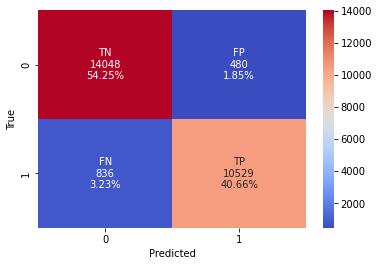

In [20]:
gbm = lgb.LGBMClassifier(max_depth = 13, n_estimators = 700, subsample = 0.3, learning_rate = 0.07)
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)
evaluation(y_test, pred_gbm)

In [21]:
!pip install mlxtend --quiet

In [24]:
import joblib

joblib.dump(gbm, 'LightGBM_model.pkl')

['LightGBM_model.pkl']

In [26]:
model_from_joblib = joblib.load('LightGBM_model.pkl')